In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
churn_df = pd.read_csv(r"C:\Users\admin\Downloads\FuelConsumptionCo2.csv")

In [3]:
churn_df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#Test set; straight line with Gaussian noise
xmin,xmax=-7,7
n_samples=77

In [5]:
np.random.seed(0)

In [6]:
x=np.random.normal(size=n_samples)
y=(x>0).astype(np.float)
x[x>0]*=3

In [7]:
x+=.4*np.random.normal(size=n_samples)
x=x[:,np.newaxis]

In [8]:
#Classifier
clf=linear_model.LogisticRegression(C=1e4)
clf.fit(x,y)

LogisticRegression(C=10000.0)

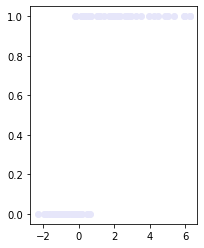

In [9]:
plt.figure(1,figsize=(3,4))

plt.clf()
plt.scatter(x.ravel(),y,color='lavender',zorder=17)

In [10]:
x_test=np.linspace(-7,7,277)
def model(x):
    return 1/(1+np.exp(-x))

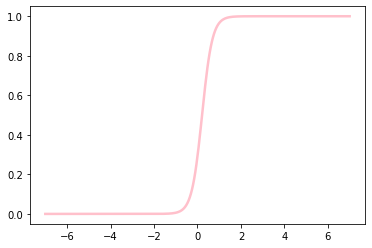

In [11]:
loss=model(x_test*clf.coef_+clf.intercept_).ravel()
plt.plot(x_test,loss,color='pink',linewidth=2.5)